# CESATEM descriptive analysis

import all dependensis

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

read and clean data and select colums without micro-entreprise

In [47]:
data_frame = pd.read_csv("../data/raw/CESATEM.tsv", delimiter='\t')
data_frame = data_frame.dropna(axis=1, how='any')
columns = ["BR", "BS", "BT", "BV", "BW", "BX", "BY", "BZ", "CA", "CB", "CC", "CD"]
data_frame = data_frame[columns + ["Date"]]
data_frame.head()

,BR,BS,BT,BV,BW,BX,BY,BZ,CA,CB,CC,CD,Date
0,1107,1055,2948,4473,529,1018,754,579,683,2842,1486,1142,01/2000
1,1124,1088,3051,4366,523,1062,833,598,671,3197,1566,1134,02/2000
2,1026,971,2887,4426,442,967,865,573,672,2844,1452,1038,03/2000
3,1114,1061,3117,4467,490,1084,919,597,700,3146,1699,1293,04/2000
4,1207,1131,3188,4555,506,1145,973,636,806,3041,1485,1311,05/2000


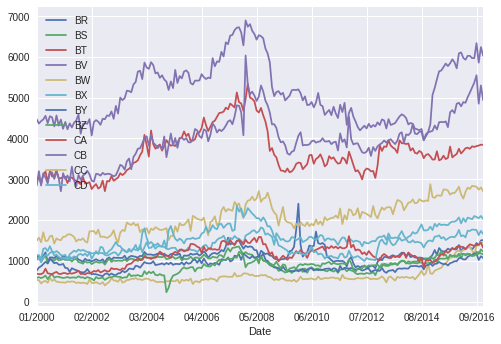

In [48]:
plt.figure()
data_frame.plot.line(x="Date")
plt.show()

sum all columns to get total compagny created

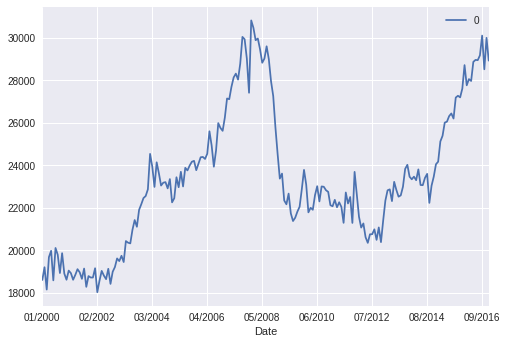

In [40]:
s = data_frame.copy().drop("Date", axis=1).sum(axis=1)
plt.figure()
d = pd.concat([s, data_frame[["Date"]]], axis=1)
d.plot(x="Date")
plt.show()

extract 4 ranges and and compute sum of them

In [41]:
d1 = pd.DataFrame(data_frame.head(50).sum(axis=0)).transpose()
d2 = pd.DataFrame(data_frame.iloc[150:200].sum(axis=0)).transpose()
d3 = pd.DataFrame(data_frame.iloc[50:100].sum(axis=0)).transpose()
d4 = pd.DataFrame(data_frame.iloc[100:150].sum(axis=0)).transpose()
data = pd.concat([d1, d3, d4, d2]).reset_index(drop=True)
data = data.drop("Date", axis=1)
data.head()

,BR,BS,BT,BV,BW,BX,BY,BZ,CA,CB,CC,CD
0,53342,50385,153883,231985,24709,58289,39486,29983,38571,159105,81697,62585
1,61141,56063,215597,293473,27704,70419,49192,41871,64980,211399,100232,86462
2,58291,39781,176670,251049,28318,77276,41397,45117,62858,203304,105242,65240
3,57094,48496,181860,246030,39499,87552,44176,50971,57519,212897,124055,73994


### Number of compagnies created for periods

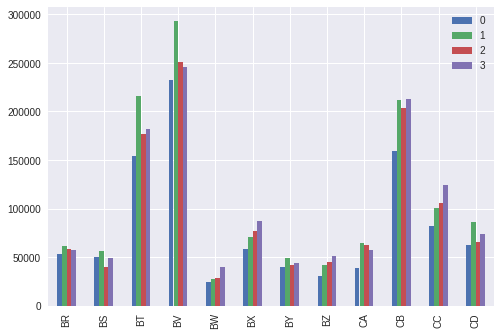

In [43]:
d = data.copy().transpose()
d.plot.bar()
plt.show()

###  By percentage of compagnies created

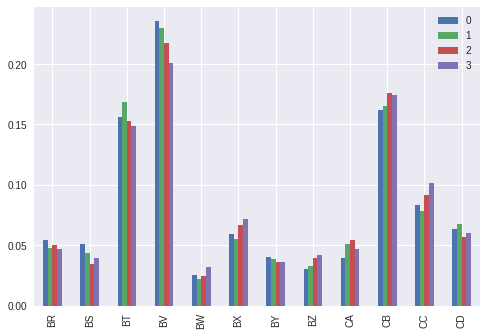

In [44]:
n_data = d / d.sum()
plt.figure(figsize=(40, 40))
n_data.plot.bar()
plt.show()

# Correlation

search for lineare correlation between columns

### First example : with BV and CC

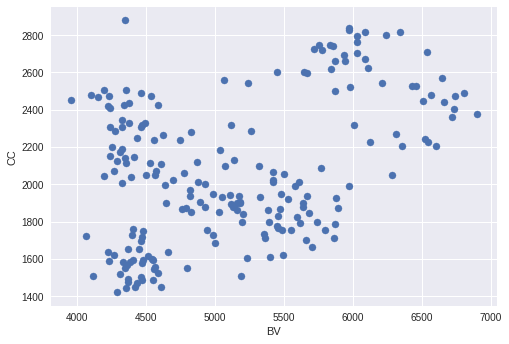

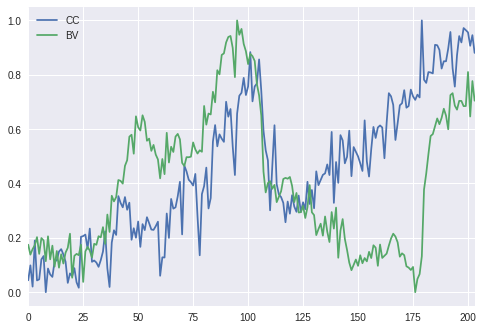

In [45]:
d_c = data_frame.copy().drop("Date", axis=1)
plt.figure(figsize=(40, 40))
d_c.plot.scatter(x="BV", y="CC", s=50)
plt.show()
tmp = d_c[["CC", "BV"]]
tmp = (tmp - tmp.min()) / (tmp.max() - tmp.min())
plt.figure(figsize=(40, 40))
tmp.plot.line()
plt.show()

BV and CC are not correlated, we need to keep both

### Second example : with BT and CD

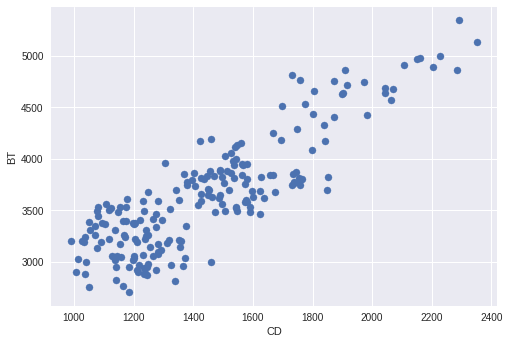

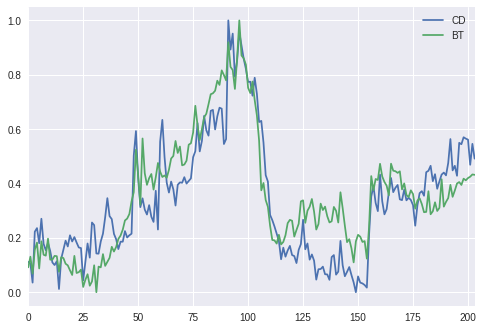

In [46]:
plt.figure(figsize=(40, 40))
d_c.plot.scatter(x="CD", y="BT", s=50)
plt.show()
plt.figure(figsize=(40, 40))
tmp = d_c[["CD", "BT"]]
tmp = (tmp - tmp.min()) / (tmp.max() - tmp.min())
tmp.plot.line()
plt.show()

CD and BT are highly correlated, we can delete one or merge them

### For all correlations

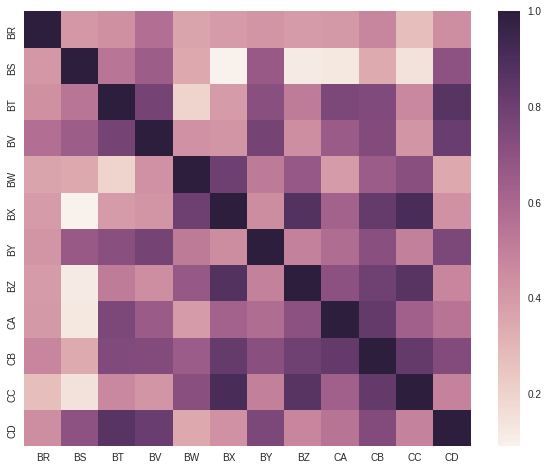

In [42]:
corr = d_c.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()